In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


In [4]:
#EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [5]:
# Null values/Missing values

print(df.isnull().sum().sum())

52


# Rule 

If count of null values are less than 30% of data size then delete the missing data 

If count of null values are more than 30% of data size then fill the missing data 



In [6]:
#Drop all the null values
df.dropna(inplace=True)
df.isnull().sum()

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

# Duplicate values

In [7]:
print(df.duplicated().sum())

0


# Encoding
We will be using label encoding that will convert all catagorical values to numeric values by alphabetical order.



In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in df.columns:
    if df[i].dtype=="object":
        df[i] = le.fit_transform(df[i])


In [9]:
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,1,23.210,0.0,0,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,2,1121.87390
1,18.0,1,30.140,0.0,0,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,2,1131.50660
2,18.0,1,33.330,0.0,0,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,2,1135.94070
3,18.0,1,33.660,0.0,0,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,2,1136.39940
4,18.0,1,34.100,0.0,0,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,2,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,0,35.530,0.0,1,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,1,55135.40209
1334,31.0,0,38.095,1.0,1,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,0,58571.07448
1335,52.0,1,34.485,3.0,1,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,1,60021.39897
1336,45.0,1,30.360,0.0,1,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,2,62592.87309


In [10]:
#Divide the data into x(12 columns) and y(1 column) into independent and dependent variable

x =df.drop(columns="charges") # All columns except dependent column
y = df["charges"] # Only dependent column

In [11]:
x

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
0,18.0,1,23.210,0.0,0,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,2
1,18.0,1,30.140,0.0,0,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,2
2,18.0,1,33.330,0.0,0,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,2
3,18.0,1,33.660,0.0,0,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,2
4,18.0,1,34.100,0.0,0,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,0,35.530,0.0,1,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,1
1334,31.0,0,38.095,1.0,1,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,0
1335,52.0,1,34.485,3.0,1,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,1
1336,45.0,1,30.360,0.0,1,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,2


In [12]:
y

0        1121.87390
1        1131.50660
2        1135.94070
3        1136.39940
4        1137.01100
           ...     
1333    55135.40209
1334    58571.07448
1335    60021.39897
1336    62592.87309
1337    63770.42801
Name: charges, Length: 1287, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=67)

In [14]:
x_train

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
960,64.0,0,39.700,0.0,0,27146.662100,25.0,958881.0,1.205776e+07,1.0,2.999516e+08,3
582,40.0,1,30.875,4.0,0,8083.681554,4.0,917161.0,2.330715e+06,1.0,1.005477e+08,1
300,34.0,0,27.720,0.0,0,20270.409380,16.0,842355.0,2.642774e+06,1.0,1.088588e+08,2
428,34.0,0,37.335,2.0,0,17628.411300,16.0,865049.0,3.033876e+06,1.0,1.051486e+08,1
397,36.0,0,19.855,0.0,0,52627.441080,4.0,862607.0,3.672537e+06,1.0,3.496354e+07,0
...,...,...,...,...,...,...,...,...,...,...,...,...
947,63.0,1,36.765,0.0,0,47750.090480,6.0,955488.0,8.405721e+06,1.0,2.842581e+08,0
1027,25.0,0,32.230,1.0,0,49821.774200,12.0,975372.0,6.273042e+06,1.0,4.083680e+08,2
9,18.0,1,53.130,0.0,0,17046.585150,19.0,704425.0,1.458972e+06,0.0,9.426182e+07,2
861,59.0,0,35.200,0.0,0,22753.600730,24.0,930381.0,1.073512e+07,1.0,2.418957e+08,2


In [15]:
y_test

564      7789.63500
822     11735.87905
854     12142.57860
475      6600.36100
1263    40419.01910
           ...     
389      5383.53600
1330    49577.66240
358      4992.37640
610      8534.67180
912     13143.86485
Name: charges, Length: 258, dtype: float64

# Model Building

In [16]:
# Create a Linear Regression model
from sklearn.linear_model import LinearRegression
model_1 = LinearRegression()

In [17]:
# Train the model
model_1.fit(x_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [18]:
# Ask the model to make prediction on unseen testing data 
model_answer  = model_1.predict(x_test)

In [19]:
model_answer # Predicted values

array([ 9459.63416349, 10836.66096736, 13065.98832363,  6496.80107065,
       41987.36835516,  4057.56349911,  2679.44018264, 22704.94449223,
        7449.80549774, 10610.4030116 ,  4274.95550229,  8234.82560309,
       28307.89570237, 46243.86984822,  -323.65014487,  3551.22135191,
       12063.3989704 ,  4912.57441265, 18199.47093607,  9211.74554349,
       20852.70395302,  3853.14526793,  4011.43304755, 25368.5448549 ,
       13485.75844894,   908.49243874, 12529.06130572, 43171.13041684,
        6868.87668781,  9021.15872105,  3413.48439924, 34589.96421663,
       16383.98409166,  1706.74177052, 19459.44829922, 10538.75713297,
        7054.49740348,  8843.58879592,   391.46120048,  6738.91071987,
       18556.06672741, 25017.59392449, 12463.22122543, 24207.17278526,
        4555.87817118, 10255.3047915 ,  4312.56746059, 10074.84863819,
        2057.50692731,  7940.42194281,  9889.07499092, 61944.58143405,
       40982.23338625, 20733.0285273 ,  4997.83165038, 13283.13041257,
      

In [20]:
y_test # Actual values

564      7789.63500
822     11735.87905
854     12142.57860
475      6600.36100
1263    40419.01910
           ...     
389      5383.53600
1330    49577.66240
358      4992.37640
610      8534.67180
912     13143.86485
Name: charges, Length: 258, dtype: float64

In [21]:
# Evaluate the performance of the model
from sklearn.metrics import r2_score
print("R2 score of the model : ", r2_score(y_test, model_answer)*100)

R2 score of the model :  99.21230188242738


# Best Fit Line


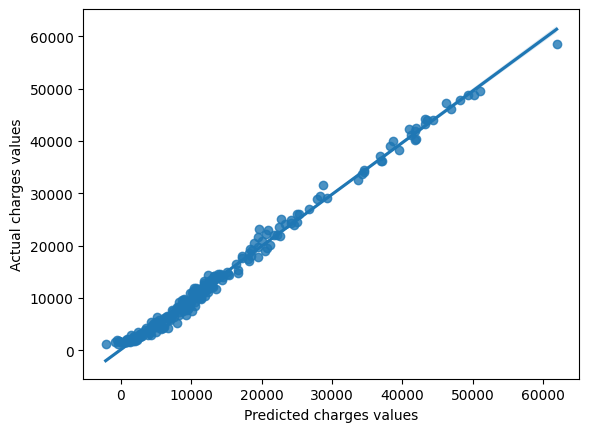

In [22]:
sn.regplot(x=model_answer, y=y_test)
plt.xlabel("Predicted charges values")
plt.ylabel("Actual charges values")
plt.show()

# Now our model (model_1) is ready. 

We can now pass our own data and ask the model to predict the charges

In [ ]:
# Take inputs from user
age = float(input("Enter age: "))
sex = int(input("Enter sex (0 = female, 1 = male): "))
bmi = float(input("Enter BMI: "))
children = float(input("Enter number of children: "))
smoker = int(input("Enter smoker (0 = No, 1 = Yes): "))
claim_amount = float(input("Enter Claim Amount: "))
past_consultations = float(input("Enter past consultations: "))
num_of_steps = float(input("Enter number of steps: "))
hospital_expenditure = float(input("Enter hospital expenditure: "))
num_past_hospitalizations = float(input("Enter number of past hospitalizations: "))
annual_salary = float(input("Enter annual salary: "))
region = int(input("Enter region (encoded value): "))

# Create input array in correct order
input_data = np.array([[ 
    age,
    sex,
    bmi,
    children,
    smoker,
    claim_amount,
    past_consultations,
    num_of_steps,
    hospital_expenditure,
    num_past_hospitalizations,
    annual_salary,
    region
]])

# Make prediction
predicted_charges = model_1.predict(input_data)

# Output result
print("\nPredicted Charges:", predicted_charges[0])
